In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys

In [2]:
async_df = pd.read_csv("data/async_data.csv")

# new_async_df
data_1 = pd.read_csv("data/new_async_data1.csv")
data_2 = pd.read_csv("data/new_async_data2.csv")

async_df = pd.concat([data_1, data_2])

sync_df = pd.read_csv("data/sync_data.csv")
# Correct for every iteration returning one iteration earlier than they should've
sync_df['avg_steps'] = sync_df['avg_steps'] + 1
print(async_df.head())
print(sync_df.head())

   Unnamed: 0  experiment  iter  noise_lvl  num_neurons_updated  \
0           0         0.0   0.0        0.0                  0.1   
1           1         0.0   0.0        0.0                  0.1   
2           2         0.0   0.0        0.0                  0.1   
3           3         0.0   0.0        0.0                  0.1   
4           4         0.0   0.0        0.0                  0.1   

   patterns_imprinted(m)  avg_recall_ratio  avg_hamming  avg_resemblance  \
0                    1.0               1.0          0.0       100.000000   
1                    2.0               1.0          0.0       100.000000   
2                    3.0               1.0          0.0       100.000000   
3                    4.0               1.0          0.0       100.000000   
4                    5.0               0.8         14.0        97.107438   

   avg_steps  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        6.0  
   Unnamed: 0  experiment  iter  noise_lvl  num_ne

In [3]:
def plot_heatmap(update_method_str, df_str, label_str, num_updated=""):
    use_df = None
    num_updated_lower = None
    num_updated_higher = None
    bounds = ''
    if (update_method_str == 'sync'):
        use_df = sync_df
        num_updated_lower = 0 # consider all num_updated rows from sync dataset 
        num_updated_higher = 1.0
    else:
        use_df = async_df
        
        if (num_updated == 'low'):
            num_updated_lower = 0.1
            num_updated_higher = 0.31
            bounds = '0.1 <= neurons_updated <= 0.3'
        elif (num_updated == 'medium'):
            num_updated_lower = 0.39
            num_updated_higher = 0.61
            bounds = '0.4 <= neurons_updated <= 0.6'
        elif (num_updated == 'high'):
            num_updated_lower = 0.7
            num_updated_higher = 1.0
            bounds = '0.7 <= neurons_updated <= 1.0'
        elif (num_updated == 'avg'):
            num_updated_lower = 0
            num_updated_higher = 1.0
            bounds = ""
        elif (num_updated == 'all'):
            num_updated_lower = 1.0
            num_updated_higher = 1.0
            bounds = "all neurons updated"
    
    columns = ["Noise Level", "Patterns Imprinted", label_str]
    
    plot_df = pd.DataFrame([], columns=columns)
    
    # Create df for sns.heatmap to use
    noises = np.arange(0.0, 1.1, 0.1)
    _MIN = 1794
    _MAX = -1
    for m in range(1, 21, 1):
        for noise in np.arange(0, 0.6, 0.1):
            rows = np.array(use_df[(round(use_df['noise_lvl'],1)==round(noise,1)) 
                                   & (use_df['patterns_imprinted(m)'] == m)
                                   & (use_df['num_neurons_updated'] >= num_updated_lower)
                                   & (use_df['num_neurons_updated'] <= num_updated_higher)
                                   ][df_str])
            
            
            avg_score = np.mean(rows)
            new_row = pd.DataFrame([[noise, m, avg_score]], columns=columns)
            plot_df = pd.concat([plot_df,new_row], ignore_index=True)
            
            if (avg_score > _MAX):
                _MAX = avg_score
            if (avg_score < _MIN):
                _MIN = avg_score
           
    # Make sure the index labels don't have the stupid 0.3000000000000000000004 bug
    plot_df["Noise Level"] = plot_df["Noise Level"].round(1)
 
    plot_df = plot_df.pivot(index="Noise Level",
                            columns="Patterns Imprinted",
                            values=label_str)
    # sns.heatmap(plot_df, 
    #             index="Noise Level", 
    #             columns="Patterns Imprinted", 
    #             values="Average Time Steps",
    #             annot=True,)
    str_title = ""
    if (update_method_str == 'async'):
        str_title = f"Average Resemblance for Async Updates {bounds}"
    else:
        str_title = "Average Resemblance for Synchronous Updates"
    fig, ax = plt.subplots(figsize=(12,4))
    ax = sns.heatmap(plot_df,
                annot=True,
                fmt='.1f',
                linewidths=0.0,
                cmap="Purples",
                cbar_kws={'label': label_str},
                # vmin=1,
                # vmin=9
                )
    ax.set_title(str_title)

    # Here is the version to change line color and border and sutff
    # ax = sns.heatmap(plot_df,
    #             annot=True,
    #             fmt='.1f',
    #             linewidths=0.7,
    #             linecolor="black",
    #             cmap="BuGn",
    #             cbar_kws={'label': label_str})
    
    # Have lower noise values at the bottom
    ax.invert_yaxis()
    plt.show()

C:\Users\levij\AppData\Local\Temp\ipykernel_29924\3055958172.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df,new_row], ignore_index=True)


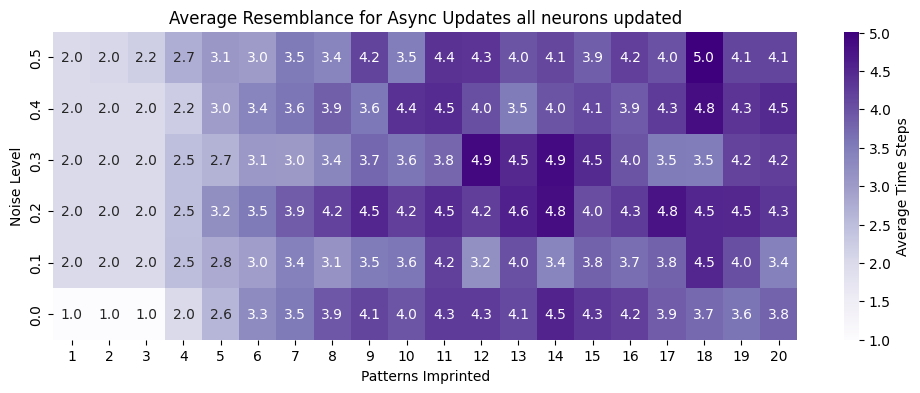

In [4]:
plot_heatmap('async', 'avg_steps', 'Average Time Steps', 'all')

C:\Users\levij\AppData\Local\Temp\ipykernel_29924\3055958172.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df,new_row], ignore_index=True)


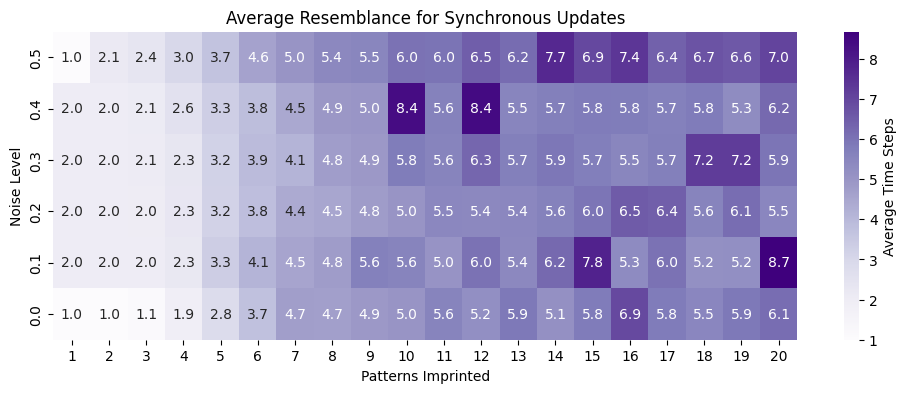

In [5]:
plot_heatmap('sync', 'avg_steps', 'Average Time Steps')

C:\Users\levij\AppData\Local\Temp\ipykernel_29924\3055958172.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df,new_row], ignore_index=True)


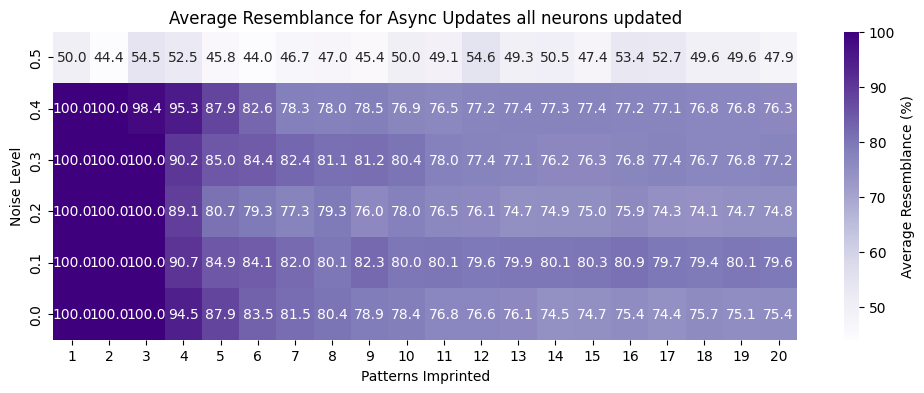

In [6]:
plot_heatmap('async', 'avg_resemblance', 'Average Resemblance (%)', num_updated='all')

C:\Users\levij\AppData\Local\Temp\ipykernel_29924\3055958172.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df,new_row], ignore_index=True)


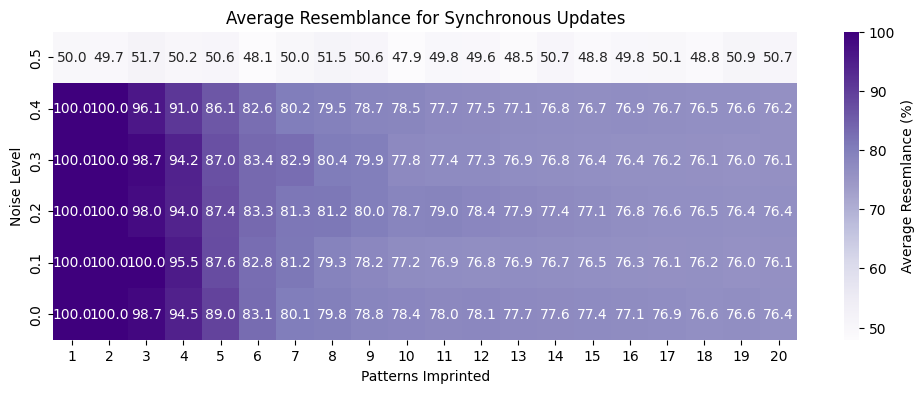

In [7]:
plot_heatmap('sync', 'avg_resemblance', 'Average Resemlance (%)')

NUMBERS CHOSEN:  7, 4, 5, 6, 
(4, 484)


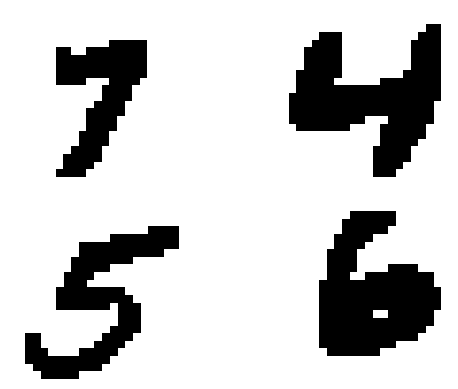

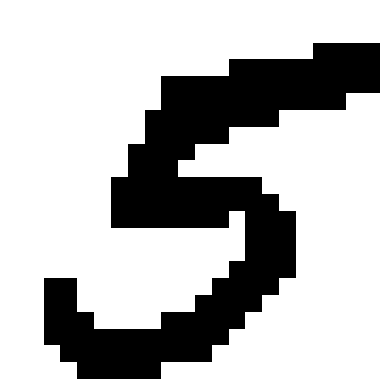

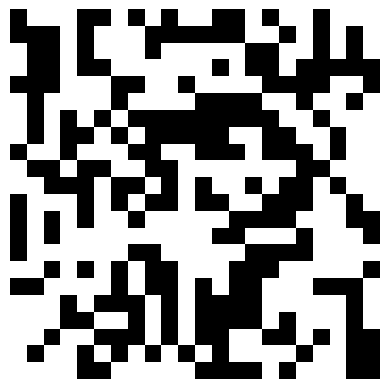

In [20]:
################ MAKE THE "PATTERNS IMPRINTED" AND "PATTERN RECOVERED" PLOT
################ WITH MNIST IMAGES
## 1.) PATTERNS imprinted -> 2.) pattern probe -> 3.) incremental images taken to get to the final 
## recovered image
import speed_of_recall as sor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# seed = 2024
# np.random.seed(seed)
all_patterns = sor.rand_mnist_matrix(4)

# WEIGHT MATRIX!!!!1
weights = sor.imprintPatterns(all_patterns)


x = 2
y = 2
fig, axs = plt.subplots(x, y)
print(all_patterns.shape)

ind = 0
for i in range(x):
    for j in range(y):
        p = all_patterns[ind]
        im = axs[i, j].imshow(sor.squarify(p), cmap="binary")
        axs[i, j].axis("off")
        ind +=1
        
plt.show()
        
rand_pattern_choice = np.random.randint(x * y)
pattern_to_screw_around_with = all_patterns[rand_pattern_choice]
noisy_pattern = pattern_to_screw_around_with.copy()


fig, ax = plt.subplots()
ax.imshow(sor.squarify(all_patterns[rand_pattern_choice]), cmap="binary")
ax.axis('off')

# Product noisified image

noise_amount = 0.0
# Pseudorandomly select (num_neurons * noise_amount) unique indices from the original image
# to flip to the other state
patlen = len(noisy_pattern)
noise_amount = 0.4
noisy_ind = np.array(np.random.choice(patlen, (int)(patlen*noise_amount), replace=False))
noisy_pattern[noisy_ind] *= -1

fig, ax = plt.subplots()
ax.imshow(sor.squarify(noisy_pattern), cmap="binary")
ax.axis("off")

plt.show()

blart
None
NUMBERS CHOSEN:  0, 5, 1, 1, 
(4, 484)


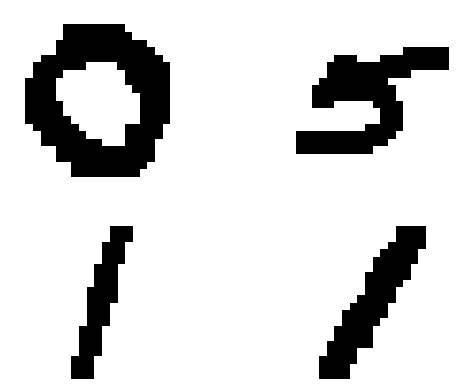

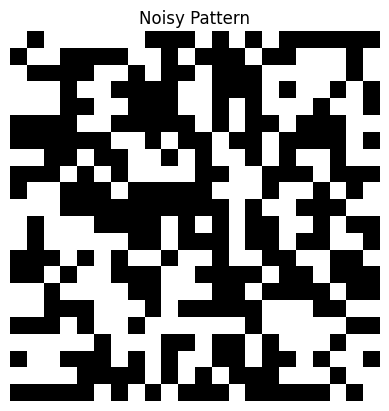

is this working


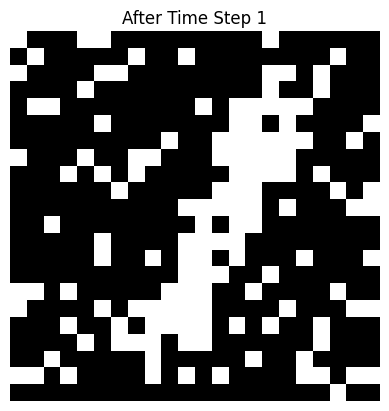

-218.0
-85722.0


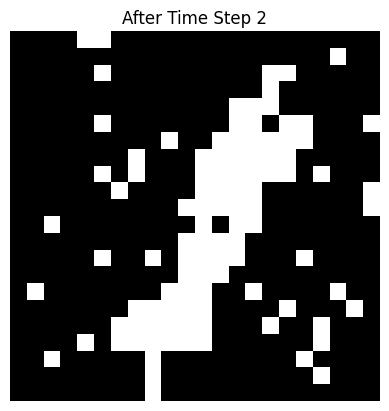

-85722.0
-155218.0


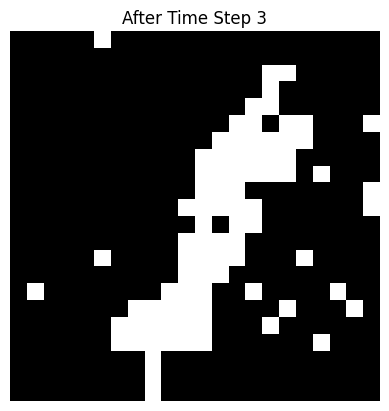

-155218.0
-181722.0


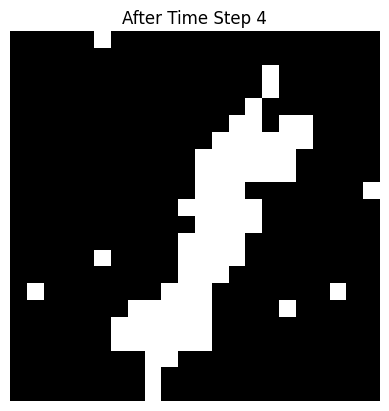

-181722.0
-200634.0


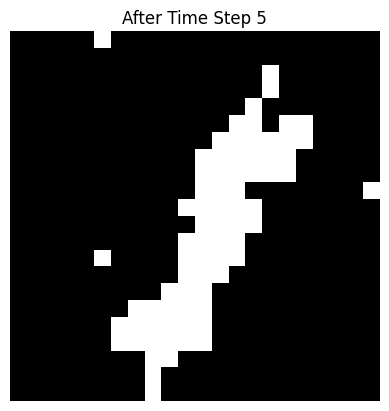

-200634.0
-207078.0


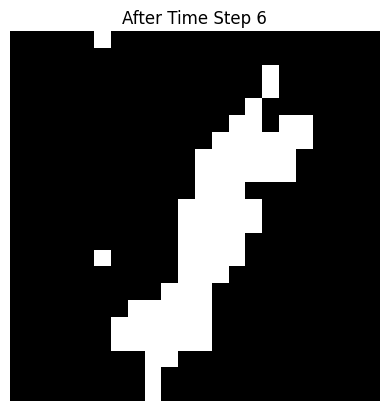

-207078.0
-211502.0


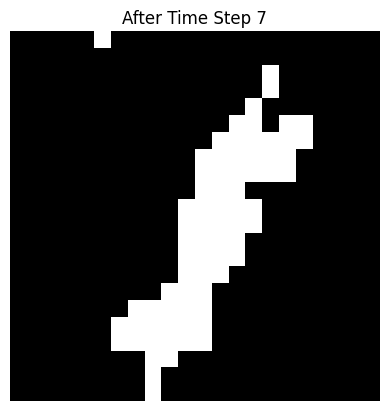

-211502.0
-213634.0


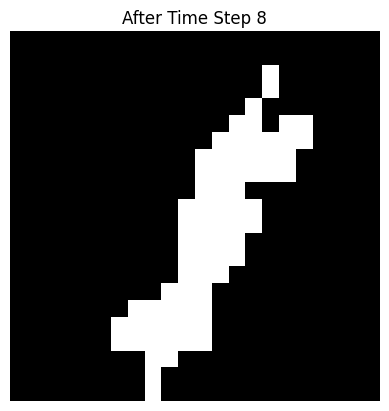

-213634.0
-215974.0


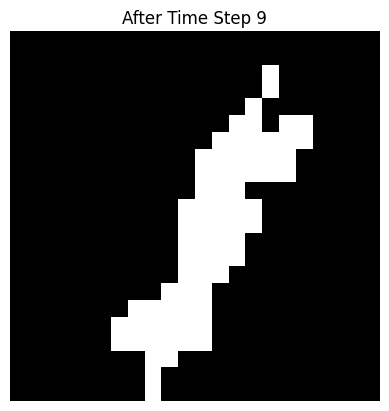

-215974.0
-215974.0
44.83471074380165
44.83471074380165
Iter: 9


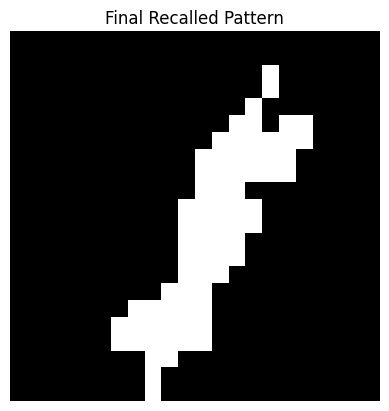

exiting


SystemExit: 

In [19]:
print(sor.PRINT_TEST())
import sys
while True:
    #np.random.seed(seed)
    all_patterns = sor.rand_mnist_matrix(4)

    # WEIGHT MATRIX!!!!1
    weights = sor.imprintPatterns(all_patterns)

    x = 2
    y = 2
    fig, axs = plt.subplots(x, y)
    print(all_patterns.shape)

    ind = 0
    for i in range(x):
        for j in range(y):
            p = all_patterns[ind]
            im = axs[i, j].imshow(sor.squarify(p), cmap="binary")
            axs[i, j].axis("off")
            ind +=1
            
    plt.show()
    
    for patt in all_patterns:
        noisy_pattern = patt.copy()
        patlen = len(noisy_pattern)
        noise_amount = 0.4
        
        noisy_ind = np.array(np.random.choice(patlen, (int)(patlen*noise_amount), replace=False))
        noisy_pattern[noisy_ind] *= -1
        
        fig, ax = plt.subplots()
        ax.imshow(sor.squarify(noisy_pattern), cmap="binary")
        ax.set_title("Noisy Pattern")
        ax.axis("off")
        plt.show()
        
                
        recalled_pattern, energy, iter = sor.async_recall(noisy_pattern, weights, pattern_to_screw_around_with)
      
                
        print(sor.resemblance(patt, noisy_pattern))
        print(sor.resemblance(patt,recalled_pattern))
        print("Iter:", iter)
        
        if iter > 2 and sor.resemblance(patt,recalled_pattern) >= 95:
            fig,ax = plt.subplots()
            ax.imshow(sor.squarify(recalled_pattern), cmap="binary")
            ax.axis('off')
            ax.set_title("Final Recalled Pattern")
            plt.show()
            print("exiting")
            sys.exit()
            


In [ ]:
print("end")